In [1]:

#Import the necesasary libraties and image files
#Create a Linear SVM model and train it
#Check the accuracy score of the model
#Predict some random images
#Improve the model using PCA


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

from tqdm import tqdm
import random as rn
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from skimage import feature, color, data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [8]:
training_image_path="seg_train/seg_train"
test_image_path="seg_test/seg_test"
X_train=[]
train_label=[]
X_test=[]
test_label=[]
scene_label=['Buildings','Forest','Glacier','Mountain','Sea','Street']

In [9]:
def histogram_extract(img_path):
    img=cv2.imread(img_path)
    img=cv2.resize(img,(80,60))
    hist_data=feature.hog(img)
    return hist_data
def to_array(scene_type,root_img_path,data_type):
    scene_path=os.path.join(root_img_path,scene_type.lower())
    print('loading '+data_type+' images for '+scene_type)
    for img in os.listdir(scene_path):
        img_path = os.path.join(scene_path,img)
        if img_path.endswith('.jpg'):
            if(data_type == 'Train'):
                X_train.append(histogram_extract(img_path))
                train_label.append(str(scene_type))
            if(data_type =='Test'):
                X_test.append(histogram_extract(img_path))
                test_label.append(np.array(str(scene_type)))


In [10]:
[to_array(scene,training_image_path,'Train')for scene in scene_label]
len(X_train)

loading Train images for Buildings
loading Train images for Forest
loading Train images for Glacier
loading Train images for Mountain
loading Train images for Sea
loading Train images for Street


14034

In [11]:
[to_array(scene,test_image_path,'Test')for scene in scene_label]
len(X_test)

loading Test images for Buildings
loading Test images for Forest
loading Test images for Glacier
loading Test images for Mountain
loading Test images for Sea
loading Test images for Street


3000

In [12]:
y_train=LabelEncoder().fit_transform(train_label)
y_test=LabelEncoder().fit_transform(test_label)

In [8]:
from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=0,tol=1e-5)
svc.fit(X_train,y_train)
print('Coef',svc.coef_)
print('Intercept',svc.intercept_)

Coef [[-0.64503317  0.09698707  0.57258215 ... -0.50216108  0.41276405
  -0.11194505]
 [ 1.07504918  0.87126116  0.2449556  ... -0.50060398 -0.06239252
   0.52287177]
 [-0.27588407 -0.22047189  0.29167076 ...  0.18159935 -0.15699242
  -0.53638534]
 [ 0.51693978 -0.29843309 -0.24823484 ... -0.32410076  0.15216312
   0.24721279]
 [ 0.17102648  0.02173343 -0.02165942 ...  0.33153798 -0.48170464
  -0.06498767]
 [ 0.1068939  -0.40869309 -0.60084973 ...  0.41935245  0.15195402
  -0.21336117]]
Intercept [-3.55951308 -8.71497259 -1.89922876  0.80828262 -2.66127498 -3.12779716]


C:\Users\vishv\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [44]:
def scene_predict(img_path):
    img = cv2.imread(img_path)
    ip_image = Image.open(img_path)
    img = cv2.resize(img,(80,60))
    prd_image_data = histogram_extract(img_path)
    scene_predicted = svc.predict(prd_image_data.reshape(1, -1))[0]
    plt.imshow(img)
    plt.title("prediction : "+scene_label[scene_predicted])    

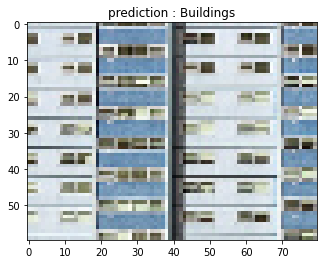

In [45]:
ip_img_folder = 'seg_pred/seg_pred/'
ip_img_files = '222.jpg'
scene_predict(os.path.join(ip_img_folder,ip_img_files))

In [49]:
svc_score = svc.score(X_test,y_test)
print('Score', svc_score)
kfold = KFold(n_splits=10, random_state=9)
cv_results = cross_val_score(svc , X_train, y_train, cv=kfold, scoring="accuracy")
print(cv_results)
print(cv_results.mean(), cv_results.std())intel

Score 0.6576666666666666


C:\Users\vishv\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\vishv\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\vishv\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\vishv\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\vishv\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceW

[0.50569801 0.72222222 0.78347578 0.43091168 0.36778332 0.2038489
 0.44618674 0.33570919 0.59942979 0.55880257]
0.4954068205493723 0.16815291073985691


C:\Users\vishv\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

C:\Users\vishv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[311,  21,  17,   7,  27,  54],
       [ 12, 424,  11,   1,   0,  26],
       [ 12,  14, 335, 125,  54,  13],
       [  9,   5, 133, 271, 101,   6],
       [ 12,   4,  69, 127, 288,  10],
       [ 54,  43,  17,   6,  10, 371]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

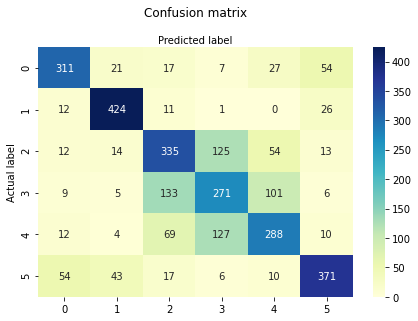

In [53]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))

Accuracy: 0.6666666666666666
Precision: 0.6670876149787995
Recall: 0.6666666666666666


In [60]:
print(y_pred)

[0 0 0 ... 4 4 5]


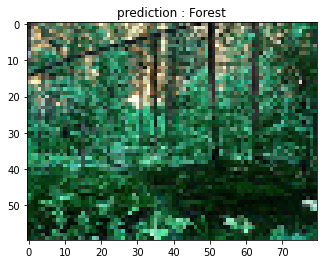

In [70]:
def log_scene_predict(img_path):
    img = cv2.imread(img_path)
    ip_image = Image.open(img_path)
    img = cv2.resize(img,(80,60))
    prd_image_data = histogram_extract(img_path)
    scene_predicted = logreg.predict(prd_image_data.reshape(1, -1))[0]
    plt.imshow(img)
    plt.title("prediction : "+scene_label[scene_predicted])    
ip_img_folder = 'seg_pred/seg_pred/'
ip_img_files = '64.jpg'
log_scene_predict(os.path.join(ip_img_folder,ip_img_files))

## KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[184 159  22  25  31  16]
 [  1 465   4   1   2   1]
 [  3  65 238  97 150   0]
 [  4  22  86 206 207   0]
 [  8  19  27  75 380   1]
 [ 35 268  40  12  25 121]]
              precision    recall  f1-score   support

           0       0.78      0.42      0.55       437
           1       0.47      0.98      0.63       474
           2       0.57      0.43      0.49       553
           3       0.50      0.39      0.44       525
           4       0.48      0.75      0.58       510
           5       0.87      0.24      0.38       501

    accuracy                           0.53      3000
   macro avg       0.61      0.54      0.51      3000
weighted avg       0.61      0.53      0.51      3000



## knn is the best algorithm(precision ~ 80), implementation:

In [18]:
import csv
import random
import math
import operator
import cv2


def calculateEuclideanDistance(variable1, variable2, length):
    distance = 0
    for x in range(length):
        distance += pow(variable1[x] - variable2[x], 2)
    return math.sqrt(distance)


def kNearestNeighbors(training_feature_vector, testInstance, k):
    distances = []
    length = len(testInstance)
    for x in range(len(training_feature_vector)):
        dist = calculateEuclideanDistance(testInstance,
                training_feature_vector[x], length)
        distances.append((training_feature_vector[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors


def responseOfNeighbors(neighbors):
    all_possible_neighbors = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in all_possible_neighbors:
            all_possible_neighbors[response] += 1
        else:
            all_possible_neighbors[response] = 1
    sortedVotes = sorted(all_possible_neighbors.items(),
                         key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def knnmain(training_feature_vector, test_feature_vector):
    classifier_prediction = []  # predictions
    k = 3  # K value of k nearest neighbor
    for x in range(len(test_feature_vector)):
        neighbors = kNearestNeighbors(training_feature_vector, test_feature_vector[x], k)
        result = responseOfNeighbors(neighbors)
        classifier_prediction.append(result)
    return classifier_prediction[0]		


## using kmeans and pca for unsueprvised learning

## pca for finding best result svc

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def best_SVC(X,y):
    svc_model = SVC()
    param_dic = {'C':[1,10,100],
                'gamma':[0.001,0.005,0.01]}
    clf = GridSearchCV(svc_model, param_dic, n_jobs=-1)
    clf.fit(X, y)
    print("Best: ", clf.best_params_)
    return clf.best_estimator_

In [22]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

def benchmark(X,y):

    pca = PCA(n_components = 24)
    pca.fit(X_train)
    reduced_X_train, reduced_X_test = pca.transform(X_train), pca.transform(X_test)

    best_model = best_SVC(reduced_X_train,y_train)
    predictions = best_model.predict(reduced_X_test)
    return accuracy_score(y_test, predictions)

In [23]:
score = benchmark(X_train, train_label)
print("Best accuracy : {}".format(score))

Best:  {'C': 100, 'gamma': 0.01}
Best accuracy : 0.7016666666666667
